In [8]:
#Importing all the libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import KFold

In [11]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [12]:
import pickle

In [13]:
#Reading raw data
data = 'https://raw.githubusercontent.com/gconsulting78-debug/machine-learning-zoomcamp-midterm_project/refs/heads/main/Teacher-Churn_Mid_Term_Project1.csv'

In [14]:
!wget $data

--2025-11-16 10:06:03--  https://raw.githubusercontent.com/gconsulting78-debug/machine-learning-zoomcamp-midterm_project/refs/heads/main/Teacher-Churn_Mid_Term_Project1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63814 (62K) [text/plain]
Saving to: ‘Teacher-Churn_Mid_Term_Project1.csv.7’

Teacher-Churn_Mid_T 100%[===================>]  62.32K  --.-KB/s    in 0.001s  

2025-11-16 10:06:03 (50.6 MB/s) - ‘Teacher-Churn_Mid_Term_Project1.csv.7’ saved [63814/63814]



In [15]:
df = pd.read_csv(data)

In [16]:
df.head()

,Teacher Id,Teacher Ethinicity,Teacher Age,Teacher Tenure,Student Ratio,Education,Teacher Rating,Teacher rating last year,Sick days,Marital status,Gender,Student Grade,Subject,Churn
0,1,European,24,12.0,40,NG,4,2,4.0,Single,Male,Primary,STEM,Yes
1,2,European,56,5.0,22,NG,4,5,7.0,Divorced,Binary,Primary,English,Yes
2,3,Chinese,51,1.0,35,PG,5,5,9.0,Divorced,Male,Secondary,STEM,No
3,4,Malay,52,6.0,40,UG,5,2,3.0,Married,Male,Primary,STEM,No
4,5,Indian,36,10.0,14,NG,5,3,1.0,Divorced,Male,Pre-K,STEM,Yes


In [17]:
df.describe().round()

,Teacher Id,Teacher Age,Teacher Tenure,Student Ratio,Teacher Rating,Teacher rating last year,Sick days
count,999.0,999.0,997.0,999.0,999.0,999.0,998.0
mean,500.0,40.0,8.0,30.0,3.0,3.0,5.0
std,289.0,12.0,4.0,12.0,1.0,1.0,3.0
min,1.0,20.0,1.0,0.0,1.0,1.0,0.0
25%,250.0,30.0,4.0,19.0,2.0,2.0,2.0
50%,500.0,41.0,9.0,31.0,3.0,3.0,5.0
75%,750.0,51.0,12.0,41.0,4.0,4.0,8.0
max,1000.0,60.0,15.0,50.0,5.0,5.0,10.0


In [18]:
print(df.isnull().sum())

Teacher Id                  0
Teacher Ethinicity          9
Teacher Age                 0
Teacher Tenure              2
Student Ratio               0
Education                   3
Teacher Rating              0
Teacher rating last year    0
Sick days                   1
Marital status              1
Gender                      2
Student Grade               5
Subject                     0
Churn                       0
dtype: int64


In [19]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [20]:
df.head().T

,0,1,2,3,4
teacher_id,1,2,3,4,5
teacher_ethinicity,european,european,chinese,malay,indian
teacher_age,24,56,51,52,36
teacher_tenure,12.0,5.0,1.0,6.0,10.0
student_ratio,40,22,35,40,14
education,ng,ng,pg,ug,ng
teacher_rating,4,4,5,5,5
teacher_rating_last_year,2,5,5,2,3
sick_days,4.0,7.0,9.0,3.0,1.0
marital_status,single,divorced,divorced,married,divorced


In [21]:
print(df.isnull().sum())

teacher_id                  0
teacher_ethinicity          9
teacher_age                 0
teacher_tenure              2
student_ratio               0
education                   3
teacher_rating              0
teacher_rating_last_year    0
sick_days                   1
marital_status              1
gender                      2
student_grade               5
subject                     0
churn                       0
dtype: int64


In [22]:
#Defining numerical and categorical variables for modeling
numerical = ['teacher_age', 'teacher_tenure', 'student_ratio',
       'teacher_rating','teacher_rating_last_year', 'sick_days']
categorical = ['teacher_ethinicity','education','marital_status','gender','student_grade','subject']

In [23]:
df[numerical] = df[numerical].fillna(0)
df[categorical] = df[categorical].fillna('NA')

In [24]:
#Converting target variable to numerical
df['churn'] = df['churn'].replace({
    'yes': 1,
    'no': 0
})

print(df['churn'].value_counts())

churn
0    771
1    228
Name: count, dtype: int64


/tmp/ipykernel_2559/3714209528.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({


In [25]:
df.head()

,teacher_id,teacher_ethinicity,teacher_age,teacher_tenure,student_ratio,education,teacher_rating,teacher_rating_last_year,sick_days,marital_status,gender,student_grade,subject,churn
0,1,european,24,12.0,40,ng,4,2,4.0,single,male,primary,stem,1
1,2,european,56,5.0,22,ng,4,5,7.0,divorced,binary,primary,english,1
2,3,chinese,51,1.0,35,pg,5,5,9.0,divorced,male,secondary,stem,0
3,4,malay,52,6.0,40,ug,5,2,3.0,married,male,primary,stem,0
4,5,indian,36,10.0,14,ng,5,3,1.0,divorced,male,pre-k,stem,1


In [26]:
#EDA
for c in categorical:
    c_counts = df[c].value_counts()
    print(c, c_counts)

teacher_ethinicity teacher_ethinicity
chinese     268
malay       249
indian      237
european    236
NA            9
Name: count, dtype: int64
education education
pg    353
ng    322
ug    321
NA      3
Name: count, dtype: int64
marital_status marital_status
married     362
single      336
divorced    299
0             1
NA            1
Name: count, dtype: int64
gender gender
male      353
binary    326
female    318
NA          2
Name: count, dtype: int64
student_grade student_grade
pre-k        347
primary      329
secondary    318
NA             5
Name: count, dtype: int64
subject subject
language    337
english     334
stem        328
Name: count, dtype: int64


In [27]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [28]:
len(df_train), len(df_val), len(df_test), len(df_full_train)

(599, 200, 200, 799)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [31]:
df_full_train = df_full_train.reset_index(drop=True)

In [32]:
y_full_train = df_full_train.churn.values
del df_full_train['churn']

In [64]:
num_fea1 = roc_auc_score(y_train, df_train['teacher_age'])

In [65]:
num_fea2 = roc_auc_score(y_train, df_train['teacher_tenure'])

In [66]:
num_fea3 = roc_auc_score(y_train, df_train['student_ratio'])

In [67]:
num_fea4 = roc_auc_score(y_train, df_train['teacher_rating'])

In [68]:
num_fea5 = roc_auc_score(y_train, df_train['teacher_rating_last_year'])

In [69]:
num_fea6 = roc_auc_score(y_train, df_train['sick_days'])

In [70]:
num_fea1, num_fea2, num_fea3, num_fea4, num_fea5, num_fea6

(np.float64(0.4365935262994086),
 np.float64(0.427629940865235),
 np.float64(0.530353252412076),
 np.float64(0.54880174291939),
 np.float64(0.5296763149704327),
 np.float64(0.5046607531901649))

In [95]:
for n in numerical:
    num_auc = roc_auc_score(y_full_train, df_full_train[n])
    print(n, num_auc)

teacher_age 0.44527969374504606
teacher_tenure 0.42720963961077296
student_ratio 0.5257306440460732
teacher_rating 0.5137275072937922
teacher_rating_last_year 0.5209622746513314
sick_days 0.49747879319358485


In [96]:
for c in categorical:
    c_mutualinfo = mutual_info_score(df_full_train[c], y_full_train)
    print(c, c_mutualinfo)


teacher_ethinicity 0.001728509858087486
education 0.0750062030687463
marital_status 0.04309161625761764
gender 0.0018893841478242242
student_grade 0.0034626970176427803
subject 0.012301090686703597


In [ ]:
#EDA on Numerical attibutes reveals highest ROC_AUC score for student ratio followed by teacher rating last year
#EDA on Categorical data reveals highest information value for education followed by marital status

In [97]:
#Modeling

In [35]:
dv = DictVectorizer(sparse=False)

train_dict = df_full_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [99]:
#Model1: Logistic Regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [101]:
model.fit(X_train, y_full_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [102]:
model.intercept_[0]

np.float64(-0.2375932462868193)

In [103]:
y_pred_train = model.predict_proba(X_train)[:, 1]

In [104]:
y_pred_val = model.predict_proba(X_val)[:, 1]

In [107]:
roc_auc_score(y_full_train, y_pred_train), roc_auc_score(y_val, y_pred_val)

(np.float64(0.8275292173297132), np.float64(0.8227211385106122))

In [110]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [114]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [117]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [115]:
from tqdm.auto import tqdm

In [126]:
#Model1: KFold validation
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = y_full_train[train_idx] 
        y_val = y_full_train[val_idx]   

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.630 +- 0.053
C=0.01 0.761 +- 0.051
C=0.1 0.800 +- 0.049
C=0.5 0.801 +- 0.049
C=1 0.801 +- 0.049
C=5 0.800 +- 0.049
C=10 0.800 +- 0.049


In [142]:
#Model2: Decision Tree Classifier
gini_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
gini_clf.fit(X_train, y_full_train)

# Predict probabilities for the positive class (Churn=1)
y_pred_gini = gini_clf.predict_proba(X_test)[:, 1]

# Calculate AUC Score
auc_gini = roc_auc_score(y_test, y_pred_gini)


# --- 3. Train with Entropy / Information Gain ---
entropy_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
entropy_clf.fit(X_train, y_full_train)

# Predict probabilities for the positive class (Churn=1)
y_pred_entropy = entropy_clf.predict_proba(X_test)[:, 1]

# Calculate AUC Score
auc_entropy = roc_auc_score(y_test, y_pred_entropy)


# --- 4. Compare Results ---
print(f"ROC AUC Score (Gini):    {auc_gini:.4f}")
print(f"ROC AUC Score (Entropy): {auc_entropy:.4f}")

if auc_gini > auc_entropy:
    print("\n✅ Gini Impurity performed better for this dataset.")
elif auc_entropy > auc_gini:
    print("\n✅ Entropy/Information Gain performed better for this dataset.")
else:
    print("\n➡️ Both criteria yielded the same performance.")

ROC AUC Score (Gini):    0.7821
ROC AUC Score (Entropy): 0.8076

✅ Entropy/Information Gain performed better for this dataset.


In [141]:
print(export_text(entropy_clf, feature_names=list(dv.get_feature_names_out())))

|--- education=ng <= 0.50
|   |--- subject=english <= 0.50
|   |   |--- teacher_tenure <= 5.50
|   |   |   |--- education=pg <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- education=pg >  0.50
|   |   |   |   |--- class: 0
|   |   |--- teacher_tenure >  5.50
|   |   |   |--- teacher_rating_last_year <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- teacher_rating_last_year >  1.50
|   |   |   |   |--- class: 0
|   |--- subject=english >  0.50
|   |   |--- student_grade=secondary <= 0.50
|   |   |   |--- education=NA <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- education=NA >  0.50
|   |   |   |   |--- class: 1
|   |   |--- student_grade=secondary >  0.50
|   |   |   |--- teacher_rating <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- teacher_rating >  2.50
|   |   |   |   |--- class: 0
|--- education=ng >  0.50
|   |--- marital_status=married <= 0.50
|   |   |--- teacher_tenure <= 14.50
|   |   |   |--- gender=male <= 0.50
|   |   |   |   |--- class: 1
|   

In [137]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_full_train.shape, y_test.shape

((799, 30), (159, 30), (200, 30), (640,), (799,), (200,))

  0%|          | 0/20 [00:00<?, ?it/s]

n_estimators:  10 | AUC: 0.8002
n_estimators:  20 | AUC: 0.8200
n_estimators:  30 | AUC: 0.8225
n_estimators:  40 | AUC: 0.8296
n_estimators:  50 | AUC: 0.8349
n_estimators:  60 | AUC: 0.8392
n_estimators:  70 | AUC: 0.8439
n_estimators:  80 | AUC: 0.8441
n_estimators:  90 | AUC: 0.8359
n_estimators: 100 | AUC: 0.8366
n_estimators: 110 | AUC: 0.8395
n_estimators: 120 | AUC: 0.8407
n_estimators: 130 | AUC: 0.8425
n_estimators: 140 | AUC: 0.8415
n_estimators: 150 | AUC: 0.8458
n_estimators: 160 | AUC: 0.8463
n_estimators: 170 | AUC: 0.8453
n_estimators: 180 | AUC: 0.8431
n_estimators: 190 | AUC: 0.8420
n_estimators: 200 | AUC: 0.8456


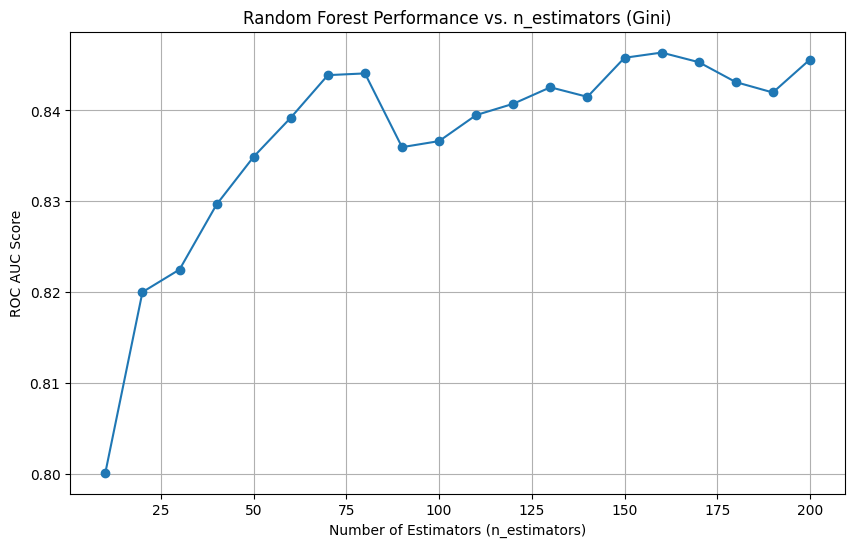

In [146]:
#Model3: Random Forest Classifier
scores = [] # List to store the AUC scores
n_values = range(10, 201, 10) 

# Loop through each n_estimator value
for n in tqdm(n_values):
    # 1. Initialize the Random Forest Classifier
    # criterion='gini' is the default for RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=n,
                                      criterion='gini',
                                      random_state=42,
                                      n_jobs=-1) # n_jobs=-1 uses all available processors

    # 2. Train the model
    rf_model.fit(X_train, y_full_train)

    # 3. Predict probabilities on the test set
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

    # 4. Calculate the ROC AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    scores.append(auc)

    print(f"n_estimators: {n:3d} | AUC: {auc:.4f}")

# Plot the results to visualize the trend

plt.figure(figsize=(10, 6))
plt.plot(n_values, scores, marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('ROC AUC Score')
plt.title('Random Forest Performance vs. n_estimators (Gini)')
plt.grid(True)
plt.show()

In [ ]:
# No of estimators where ROC_AUC Score is maximum is at 160

In [163]:
scores = [] # This will store the ROC_AUC Score for each n_estimators value
n_estimators_values = [] # This will store the n values for plotting

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        # 1. Store the current n value
        n_estimators_values.append(n)
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_full_train)

        
        y_pred = rf.predict(X_test)

    
        auc = roc_auc_score(y_test, y_pred)
        
        scores.append((d, n, auc))

In [164]:
y_test.shape, y_pred.shape, X_val.shape

((200,), (200,), (159, 30))

In [165]:
columns = ['max_depth', 'n_estimators', 'AUC']
df_scores = pd.DataFrame(scores, columns=columns)

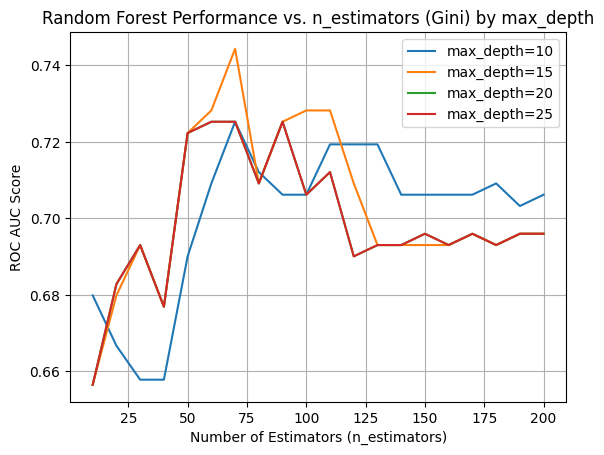

In [167]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.AUC,
             label='max_depth=%d' % d)

plt.legend()
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('ROC AUC Score')
plt.title('Random Forest Performance vs. n_estimators (Gini) by max_depth')
plt.grid(True)
plt.show()

In [171]:
max_score_index = df_scores['AUC'].idxmax()
row_with_max_score = df_scores.loc[max_score_index]
print(row_with_max_score)

max_depth       15.000000
n_estimators    70.000000
AUC              0.744321
Name: 26, dtype: float64


In [ ]:
#Best RF model performance is achieved at Depth of 15 and 70 estimators 

In [172]:
#Top 5 features
feature_names = dv.get_feature_names_out()

importances = rf.feature_importances_      

# CORRECTED LINE: Use the feature names from the vectorizer/transformer
feature_importances = pd.Series(importances, index=feature_names) 

# Sort and display the top features
top_5_features = feature_importances.sort_values(ascending=False).head(5)

print(top_5_features)

education=ng              0.106604
teacher_age               0.101317
teacher_tenure            0.090160
student_ratio             0.089015
marital_status=married    0.065114
dtype: float64


In [173]:
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [37]:
#Model4: XGBoost

In [1]:
import xgboost as xgb

In [2]:
print(xgb.__version__)

3.1.1


In [36]:
# 1. Initialize the Classifier
# Common parameters:
#   n_estimators: Number of boosting rounds (trees)
#   learning_rate: How much to shrink the contribution of each tree
#   max_depth: Depth of individual trees
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 2. Train the model
xgb_clf.fit(X_train, y_full_train)

# 3. Predict probabilities on the test set
# For AUC, we need probabilities (usually for the positive class, index 1)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# 4. Evaluate
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"XGBoost AUC Score: {auc_score:.4f}")

XGBoost AUC Score: 0.8973


In [37]:
#XGBoost has the best performance of the 4 approaches - Logistic Regression, Decision Tree, Random Forest and XGBoost

In [38]:
#Converting the model into a binary file

output_file = 'model_final.bin' # Use a different name
pipeline_objects = {'model': xgb_clf, 'vectorizer': dv}

with open(output_file, 'wb') as f_out:
    pickle.dump(pipeline_objects, f_out)

In [44]:
input_file = 'model_final.bin'
with open(input_file, 'rb') as f_in:
    # This loads the DICT: {'model': xgb_clf, 'vectorizer': dv}
    data_dict = pickle.load(f_in)

loaded_model = data_dict['model']
dv_loaded = data_dict['vectorizer']

In [50]:
teacher_data_transformed = dv_loaded.transform([teacher])
prediction = loaded_model.predict(teacher_data_transformed)
pred_prob=loaded_model.predict_proba(teacher_data_transformed)[:,1]

In [48]:
teacher_data_transformed

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1., 10.,
         0.,  0.,  1.,  0., 27.,  1.,  0.,  0., 24.,  0.,  1.,  0.,  0.,
         0.,  5.,  3.,  9.]])

In [51]:
print(prediction, pred_prob)

[1] [0.5612003]


In [56]:
from sklearn.pipeline import make_pipeline

# 1. Correctly define the pipeline steps: dv first, then xgb_clf
pipeline = make_pipeline(dv, xgb_clf)

# 2. Fit the pipeline (This will sequentially call dv.fit_transform() then xgb_clf.fit())
pipeline.fit(train_dict, y_full_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer(sparse=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [57]:
output_file = 'model_pipeline_fitted.bin' # Use a distinct name for the pipeline

with open(output_file, 'wb') as f_out:
    pickle.dump(pipeline, f_out) # Save the single pipeline object

print(f"Fitted pipeline successfully saved to {output_file}")

Fitted pipeline successfully saved to model_pipeline_fitted.bin


In [58]:
pipeline.predict_proba(teacher)[0, 1]

np.float32(0.5612003)